# Preparation

## Import relevant libraries

In [1]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib import gridspec
from matplotlib import rc

## Load data

In [2]:
# setup data path
base_path = os.path.join('..', 'datasets')
hb_df_path = os.path.join(base_path, 'processed_data', 'horizontal_bar.csv')
sc_df_path = os.path.join(base_path, 'processed_data', 'slope_chart.csv')
lc_df_path = os.path.join(base_path, 'processed_data', 'line_chart.csv')

In [3]:
# load datasets
hb_df = pd.read_csv(hb_df_path)
sc_df = pd.read_csv(sc_df_path, header = [0,1], index_col = [0,1])
lc_df = pd.read_csv(lc_df_path)

# Set-up

In [4]:
#style
plt.style.use('default')

In [5]:
# set font
rc('font', **{'family': 'sans-serif', 'sans-serif':['Avant Garde']})
rc('text', usetex=True)

In [6]:
# remove false positive warning
pd.options.mode.chained_assignment = None

## Horizontal Bar Chart

In [7]:
hb_df

,country,year,price
0,europe,2014,54.268587
1,europe,2015,60.806333
2,europe,2016,59.245487
3,europe,2017,72.821707
4,europe,2018,77.047099
5,united kingdom,2014,966.295422
6,united kingdom,2015,1035.097188
7,united kingdom,2016,1012.661340
8,united kingdom,2017,1105.911637
9,united kingdom,2018,1072.341348


In [8]:
# populate tables for visualization
hb_uk = hb_df[hb_df['country'] == 'united kingdom']
hb_eu = hb_df[hb_df['country'] == 'europe']

In [9]:
# rescale europe average stock price to uk's scale
scaling_factor = np.mean(hb_uk.price) / np.mean(hb_eu.price) 
hb_eu['price'] = hb_eu['price'].transform(lambda x: x * scaling_factor)

In [10]:
hb_eu

,country,year,price
0,europe,2014,869.181170
1,europe,2015,973.891580
2,europe,2016,948.892622
3,europe,2017,1166.333239
4,europe,2018,1234.008325


In [11]:
hb_uk

,country,year,price
5,united kingdom,2014,966.295422
6,united kingdom,2015,1035.097188
7,united kingdom,2016,1012.661340
8,united kingdom,2017,1105.911637
9,united kingdom,2018,1072.341348


In [12]:
# percentage diff post-brexit
def p_diff(x, y):
    pct = (float(x) - float(y)) / float(y) * 100
    return '{:.2f}\%'.format(pct)
diff_2017 = p_diff(hb_eu.price[hb_eu['year'] == 2017], hb_uk.price[hb_uk['year'] == 2017])
diff_2018 = p_diff(hb_eu.price[hb_eu['year'] == 2018], hb_uk.price[hb_uk['year'] == 2018])

## Slope Chart

In [13]:
sc_df.reset_index(inplace = True)
sc_df

country                  sector debt_to_assets_index              \
year                                                         2014        2015   
0             europe  consumer discretionary                100.0   94.193846   
1             europe        consumer staples                100.0   95.324571   
2             europe    energy and materials                100.0   98.750000   
3             europe              financials                100.0   97.414717   
4             europe             industrials                100.0   98.797313   
5             europe               utilities                100.0  104.912866   
6     united kingdom  consumer discretionary                100.0   91.259702   
7     united kingdom        consumer staples                100.0   99.544795   
8     united kingdom    energy and materials                100.0  127.037765   
9     united kingdom              financials                100.0   87.446716   
10    united kingdom             industrials                100.0  103.690129   
11    united kingdom               utilities                100.0  103.954229   

                                         debt_to_assets_pct_change            \
year        2016        2017        2018                      2015      2016   
0      84.921407   81.557524   87.860325                 -0.058062 -0.098440   
1     101.545025  104.369884  101.717975                 -0.046754  0.065256   
2     105.491453   98.753561   93.411681                 -0.012500  0.068268   
3      92.139405   93.617730   97.259980                 -0.025853 -0.054153   
4      98.174442   98.007004  104.344789                 -0.012027 -0.006305   
5     110.854653  113.283278   91.147571                  0.049129  0.056635   
6      94.271615   98.706442  102.032962                 -0.087403  0.033004   
7      94.013858   93.893007   89.602804                 -0.004552 -0.055562   
8     127.004308  113.454059  119.350926                  0.270378 -0.000263   
9      82.218356   88.029578   85.237060                 -0.125533 -0.059789   
10    106.904953  103.246863   99.167688                  0.036901  0.031004   
11    100.778534  103.248117  101.386877                  0.039542 -0.030549   

                         price_index                                      \
year      2017      2018        2014        2015        2016        2017   
0    -0.039612  0.077280       100.0  111.926466  117.846159  160.647777   
1     0.027819 -0.025409       100.0  112.962987  110.531877  122.578328   
2    -0.063871 -0.054093       100.0  110.537927  103.729369  126.562270   
3     0.016044  0.038906       100.0  118.114052  115.753761  132.508323   
4    -0.001706  0.064667       100.0  111.117650  104.457957  127.650986   
5     0.021908 -0.195401       100.0   84.954611   65.560702   68.785323   
6     0.047043  0.033701       100.0  118.297111  109.582503  116.097625   
7    -0.001285 -0.045692       100.0  112.888875  127.973442  142.741233   
8    -0.106691  0.051976       100.0   90.628475   89.457791   99.858144   
9     0.070680 -0.031723       100.0  113.359287  109.521622  138.944216   
10   -0.034218 -0.039509       100.0   91.297675   80.572448   88.256991   
11    0.024505 -0.018027       100.0  105.621257  109.767209  104.230080   

                 price_pct_change                                
year        2018             2015      2016      2017      2018  
0     190.444474         0.119265  0.052889  0.363199  0.185478  
1     123.808611         0.129630 -0.021521  0.108986  0.010037  
2     124.532624         0.105379 -0.061595  0.220120 -0.016037  
3     137.712780         0.181141 -0.019983  0.144743  0.039276  
4     127.887518         0.111177 -0.059934  0.222032  0.001853  
5      74.599012        -0.150454 -0.228286  0.049185  0.084519  
6     111.471692         0.182971 -0.073667  0.059454 -0.039845  
7     131.597105         0.128889  0.133623  0.115397 -0.078072  
8     106.776066        -0.09371

In [14]:
# populate tables for visualization
for country in sc_df.country.unique():
    df = sc_df[sc_df['country'] == country]
    for value in ['debt_to_assets', 'price']:
        index = '_'.join([value, 'index'])
        pct = '_'.join([value, 'pct_change'])
        table = pd.concat([df['sector'], df[index], df[pct, '2017']], 
                          axis = 1)
        table.rename(columns = {table.columns[-1]: 'pct_change2016_17'}, inplace = True)
        if country == 'europe':
            var_name = '_'.join(['eu', value])
        elif country == 'united kingdom':
            var_name = '_'.join(['uk', value])
        vars()[var_name] = table
        print('A variable `{}` was created!'.format(var_name))

A variable `eu_debt_to_assets` was created!
A variable `eu_price` was created!
A variable `uk_debt_to_assets` was created!
A variable `uk_price` was created!


In [15]:
uk_debt_to_assets

,sector,2014,2015,2016,2017,2018,pct_change2016_17
6,consumer discretionary,100.0,91.259702,94.271615,98.706442,102.032962,0.047043
7,consumer staples,100.0,99.544795,94.013858,93.893007,89.602804,-0.001285
8,energy and materials,100.0,127.037765,127.004308,113.454059,119.350926,-0.106691
9,financials,100.0,87.446716,82.218356,88.029578,85.237060,0.070680
10,industrials,100.0,103.690129,106.904953,103.246863,99.167688,-0.034218
11,utilities,100.0,103.954229,100.778534,103.248117,101.386877,0.024505


## Line Chart

In [16]:
lc_uk = lc_df[lc_df['country'] == 'united kingdom']
lc_eu = lc_df[lc_df['country'] == 'europe']

In [17]:
np.tile([0.95, 0.05], 2)

array([0.95, 0.05, 0.95, 0.05])

# Visualization

<ipython-input-18-9b7f2bf34331>:485: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax5.set_xticklabels(tick_label)


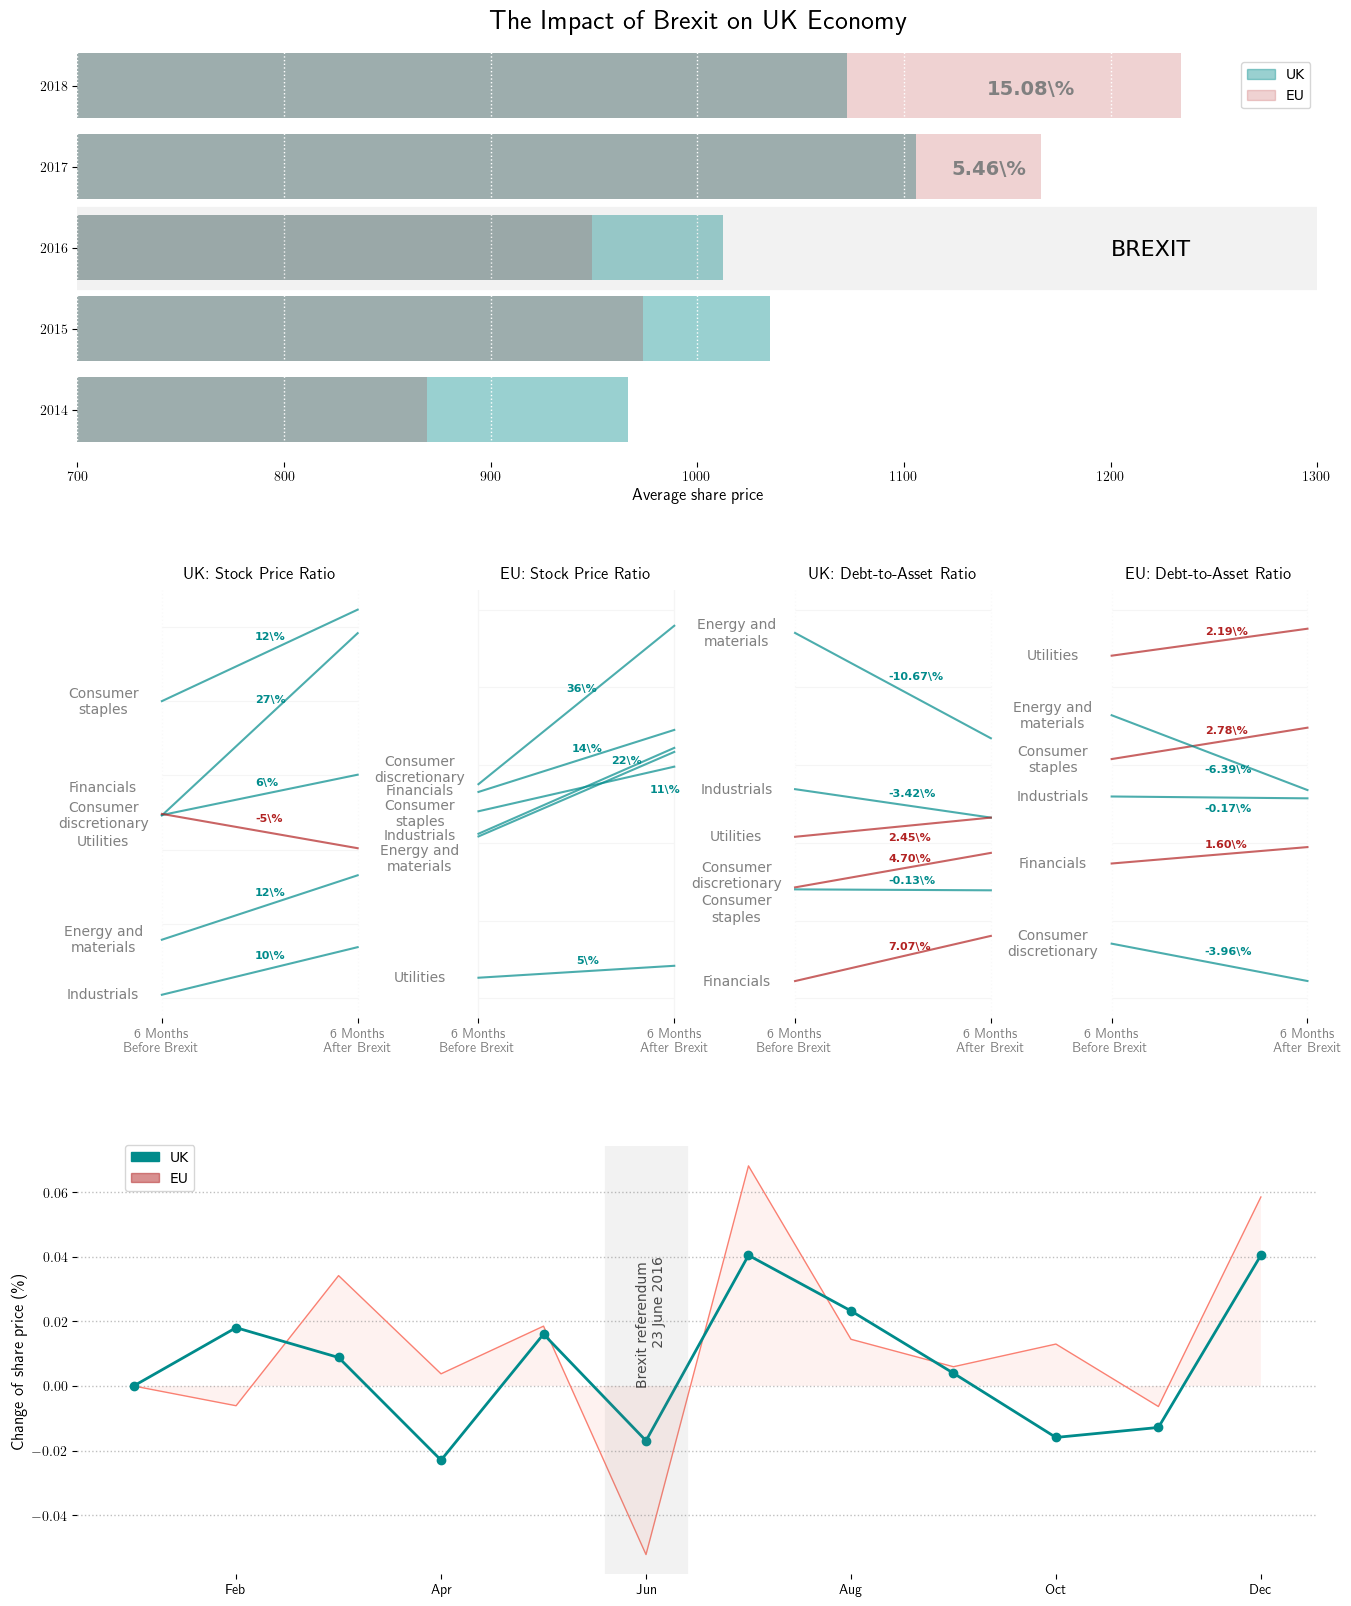

In [18]:
""" Setup """

# create the figure
fig = plt.figure(figsize = (16, 20))

# populate subplots and customize their sizes and locations
spec = gridspec.GridSpec(ncols = 8, nrows = 5, 
                         figure = fig,
                         height_ratios = [0.95, 0.05, 0.95, 0.05, 0.95],
                         width_ratios = np.tile([0.18, 0.8], 4))
# Horizontal bar chart
ax0 = fig.add_subplot(spec[0, :]) 
# Slope chart
ax1 = fig.add_subplot(spec[2, 1])
# Slope chart
ax2 = fig.add_subplot(spec[2, 3])
# Slope chart
ax3 = fig.add_subplot(spec[2, 5])
# Slope chart
ax4 = fig.add_subplot(spec[2, 7])
# Line chart
ax5 = fig.add_subplot(spec[4, :])

# set style
plt.style.use('default')

# set viz title
ax0.set_title("The Impact of Brexit on UK Economy", 
              fontsize = 20, 
              fontweight = 'bold',
              verticalalignment = 'top')


""" Horizontal Bar Chart """

# set horizontal range
ax0.set_xlim(700,1300)

ax0.barh(hb_uk['year'], hb_uk['price'], color = 'darkcyan', alpha = 0.4, linewidth = 3)
ax0.barh(hb_eu['year'], hb_eu['price'], color = 'firebrick', alpha = 0.2)


# remove spines
for spine in ['left', 'right', 'top', 'bottom']:
    ax0.spines[spine].set_visible(False)

ax0.set_xlabel("Average share price", fontsize = 12)
dca1_patch = mpatches.Patch(color='darkcyan', alpha = 0.4, label='UK')
dca2_patch = mpatches.Patch(color='firebrick',alpha = 0.2, label='EU')
ax0.legend(handles=[dca1_patch, dca2_patch], bbox_to_anchor = (1, 0.95))
ax0.grid(axis='x', color = 'white', linewidth = 1, alpha = 1, ls = ':')

# add shade for 2016
ax0.axhline(y=2016,linewidth= 60, alpha=0.1, color='grey')
# add text
ax0.text(x = 1200,
         y = 2015.9,
         s = 'BREXIT',
         fontdict={'size': 16})

ax0.text(x = 1123, 
         y = 2016.9,
         color = 'grey',
         s=diff_2017,
        fontdict={'size': 14, 'weight': 'bold'})
ax0.text(x = 1140, 
         y = 2017.9, 
         s=diff_2018,
         color = 'grey',
        fontdict={'size': 14, 'weight': 'bold'})

""" Slope Chart """

""" UK: Price """

table = uk_price

# generate scatter plots (coordinate for line)
ax1.scatter(y=table['2016'], x=np.repeat(1, table.shape[0]),
            s=10, color='w', alpha=0.7)
ax1.scatter(y=table['2017'], x=np.repeat(3, table.shape[0]),
            s=10, color='w', alpha=0.7)

# define a function to draw a line
def drawline(p1, p2, ax):
    l = mlines.Line2D([p1[0], p2[0]], [p1[1], p2[1]],
                        color='firebrick' if p1[1] - p2[1] > 0 else 'darkcyan', alpha=0.7)
    ax.add_line(l)
    return l

for y1, y2, c, p in zip(table['2016'], table['2017'],
                        table['sector'], table['pct_change2016_17']):
    drawline([1, y1], [3, y2], ax1)

# label sectors on the left axis
# define adjusted coordinates
x_adj = np.repeat(-0.6, 6)
y_adj = [0, 0, 0, 4.5, 0, -4.5]
for i, sector in enumerate(table.sector):
    # adjust label
    if bool(re.search('energy', sector)) == True:
        text = re.sub('and ', 'and\n', sector)
    else:
        text = re.sub('consumer ', 'consumer\n', sector)
    ax1.text(x = 1 + x_adj[i], 
            y = table[table['sector'] == sector]['2016'] + y_adj[i], 
            s = text.capitalize(), 
            horizontalalignment='center',
            verticalalignment='center',
            fontdict={'size': 10},
            color = 'grey')

# label sectors on the right axis
# define adjusted coordinates
x_adj = np.repeat(0.03, 6)
y_adj = [0, 0, 0, 0, 0, 0]
for i, sector in enumerate(table.sector):
    ax1.text(x = 3 + x_adj[i], 
            y = table[table['sector'] == sector]['2017'] + y_adj[i], 
            s = sector.capitalize(), 
            horizontalalignment='left',
            verticalalignment='center',
            fontdict={'size': 10},
            visible = False)
    
#loop to get middle point
mean = []
for i, j in zip(table['2016'], table['2017']):
    m = np.mean((i, j))
    mean.append(m)

# label percentage change
# define adjusted coordinates and colors
x_adj = np.repeat(-0.05, 6)
y_adj = [2, 3, 2.5, 4, 2.5, 2]
colors = ['darkcyan', 'darkcyan', 'darkcyan', 'darkcyan', 'darkcyan', 'firebrick']
for i, pct in enumerate(table.pct_change2016_17):
    ax1.text(x = 2 + x_adj[i],
            y = mean[i] + y_adj[i],
            s = '{:.0f}\%'.format(pct * 100), 
            horizontalalignment='left',
            verticalalignment='center',
            color = colors[i],
            fontdict={'size': 8, 'weight': 700})

# remove y-axis
ax1.axes.yaxis.set_visible(False)

# set x-axis
ax1.axes.xaxis.set_visible(True)

# remove spines
for spine in ['left', 'right', 'top', 'bottom']:
    ax1.spines[spine].set_visible(False)

# creat gridlines
hlines = np.linspace(80, 140, 6)
for hline in hlines:
    ax1.hlines(hline, 1, 3, color = 'whitesmoke', linewidth = 0.75)
    
ax1.grid(color='whitesmoke', linestyle=':', linewidth=1, alpha = 0.5)

# Title and Label
ax1.set_title('UK: Stock Price Ratio',
             fontdict={'size': 12},
             verticalalignment='bottom')
ax1.set_xticks([1, 3])
ax1.set_xticklabels(['6 Months\nBefore Brexit', '6 Months\nAfter Brexit'],
                   color = 'grey')


""" EU: Price """

table = eu_price

# generate scatter plots (coordinate for line)
ax2.scatter(y=table['2016'], x=np.repeat(1, table.shape[0]),
            s=10, color='w', alpha=0.7)
ax2.scatter(y=table['2017'], x=np.repeat(3, table.shape[0]),
            s=10, color='w', alpha=0.7)

# define a function to draw a line
def drawline(p1, p2, ax):
    l = mlines.Line2D([p1[0], p2[0]], [p1[1], p2[1]],
                        color='firebrick' if p1[1] - p2[1] > 0 else 'darkcyan', alpha=0.7)
    ax.add_line(l)
    return l

for y1, y2, c, p in zip(table['2016'], table['2017'],
                        table['sector'], table['pct_change2016_17']):
    drawline([1, y1], [3, y2], ax2)

# label sectors on the left axis
# define adjusted coordinates
x_adj = np.repeat(-0.6, 6)
y_adj = [4, -0.5, -6, 0.5, -0.5, 0]
for i, sector in enumerate(table.sector):
    # adjust label
    if bool(re.search('energy', sector)) == True:
        text = re.sub('and ', 'and\n', sector)
    else:
        text = re.sub('consumer ', 'consumer\n', sector)
    ax2.text(x = 1 + x_adj[i], 
            y = table[table['sector'] == sector]['2016'] + y_adj[i], 
            s = text.capitalize(), 
            horizontalalignment='center',
            verticalalignment='center',
            fontdict={'size': 10},
            color = 'grey')

# label sectors on the right axis
# define adjusted coordinates
x_adj = np.repeat(0.03, 6)
y_adj = [0, -1.5, -1.5, 1, 1, 0]
for i, sector in enumerate(table.sector):
    ax2.text(x = 3 + x_adj[i], 
            y = table[table['sector'] == sector]['2017'] + y_adj[i], 
            s = sector.capitalize(), 
            horizontalalignment='left',
            verticalalignment='center',
            fontdict={'size': 10},
            visible = False)
    
#loop to get middle point
mean = []
for i, j in zip(table['2016'], table['2017']):
    m = np.mean((i, j))
    mean.append(m)

# label percentage change
# define adjusted coordinates and colors
x_adj = [-0.1, 0.75, 0.35, -0.05, 0, 0]
y_adj = [4.5, 0, 9, 3.5, 0, 3]
colors = ['darkcyan', 'darkcyan', 'darkcyan', 'darkcyan', 'pass', 'darkcyan']
for i, pct in enumerate(table.pct_change2016_17):
    if i != 4:
        ax2.text(x = 2 + x_adj[i],
                y = mean[i] + y_adj[i],
                s = '{:.0f}\%'.format(pct * 100), 
                horizontalalignment='left',
                verticalalignment='center',
                color = colors[i],
                fontdict={'size': 8, 'weight': 700})
    elif i == 4:
        pass

# remove y-axis
ax2.axes.yaxis.set_visible(False)

# set x-axis
ax2.axes.xaxis.set_visible(True)

# remove spines
for spine in ['left', 'right', 'top', 'bottom']:
    ax2.spines[spine].set_visible(False)

# creat gridlines
hlines = np.linspace(60, 165, 6)
for hline in hlines:
    ax2.hlines(hline, 1, 3, color = 'whitesmoke', linewidth = 0.75)
    
ax2.grid(color='whitesmoke', linestyle='-', linewidth=1)

# Title and Label
ax2.set_title('EU: Stock Price Ratio',
             fontdict={'size': 12},
             verticalalignment='bottom')
ax2.set_xticks([1, 3])
ax2.set_xticklabels(['6 Months\nBefore Brexit', '6 Months\nAfter Brexit'],
                   color = 'grey')



""" UK: Debt to Asset Ratio """

table = uk_debt_to_assets

# generate scatter plots (coordinate for line)
ax3.scatter(y=table['2016'], x=np.repeat(1, table.shape[0]),
            s=10, color='w', alpha=0.7)
ax3.scatter(y=table['2017'], x=np.repeat(3, table.shape[0]),
            s=10, color='w', alpha=0.7)

# define a function to draw a line
def drawline(p1, p2, ax):
    l = mlines.Line2D([p1[0], p2[0]], [p1[1], p2[1]],
                        color='darkcyan' if p1[1] - p2[1] > 0 else 'firebrick', alpha=0.7)
    ax.add_line(l)
    return l

for y1, y2, c, p in zip(table['2016'], table['2017'],
                        table['sector'], table['pct_change2016_17']):
    drawline([1, y1], [3, y2], ax3)

# label sectors on the left axis
# define adjusted coordinates
x_adj = np.repeat(-0.6, 6)
y_adj = [1.5, -2.5, 0, 0, 0, 0]
for i, sector in enumerate(table.sector):
    # adjust label
    if bool(re.search('energy', sector)) == True:
        text = re.sub('and ', 'and\n', sector)
    else:
        text = re.sub('consumer ', 'consumer\n', sector)
    ax3.text(x = 1 + x_adj[i], 
            y = table[table['sector'] == sector]['2016'] + y_adj[i], 
            s = text.capitalize(), 
            horizontalalignment='center',
            verticalalignment='center',
            fontdict={'size': 10},
            color = 'grey')

# label sectors on the right axis
# define adjusted coordinates
x_adj = np.repeat(0.03, 6)
y_adj = [0, 0, 0, 0, -0.75, 0.75]
for i, sector in enumerate(table.sector):
    ax3.text(x = 3 + x_adj[i], 
            y = table[table['sector'] == sector]['2017'] + y_adj[i], 
            s = sector.capitalize(), 
            horizontalalignment='left',
            verticalalignment='center',
            fontdict={'size': 10},
            visible = False)
    
#loop to get middle point
mean = []
for i, j in zip(table['2016'], table['2017']):
    m = np.mean((i, j))
    mean.append(m)

# label percentage change
# define adjusted coordinates and colors
x_adj = np.repeat(-0.05, 6)
y_adj = [1.5, 1.25, 1.25, 1.5, 1.25, -1.25]
colors = ['firebrick', 'darkcyan', 'darkcyan', 'firebrick', 'darkcyan', 'firebrick']
for i, pct in enumerate(table.pct_change2016_17):
    ax3.text(x = 2 + x_adj[i],
            y = mean[i] + y_adj[i],
            s = '{:.2f}\%'.format(pct * 100), 
            horizontalalignment='left',
            verticalalignment='center',
            color = colors[i],
            fontdict={'size': 8, 'weight': 700})

# remove y-axis
ax3.axes.yaxis.set_visible(False)

# set x-axis
ax3.axes.xaxis.set_visible(True)

# remove spines
for spine in ['left', 'right', 'top', 'bottom']:
    ax3.spines[spine].set_visible(False)

# creat gridlines
hlines = np.linspace(80, 130, 6)
for hline in hlines:
    ax3.hlines(hline, 1, 3, color = 'whitesmoke', linewidth = 0.75)

ax3.grid(color='whitesmoke', linestyle=':', linewidth=1, alpha = 0.5)

# Title and Label
ax3.set_title('UK: Debt-to-Asset Ratio',
             fontdict={'size': 12},
             verticalalignment='bottom')
ax3.set_xticks([1, 3])
ax3.set_xticklabels(['6 Months\nBefore Brexit', '6 Months\nAfter Brexit'],
                   color = 'grey')


""" EU: Debt to Asset Ratio """

table = eu_debt_to_assets

# generate scatter plots (coordinate for line)
ax4.scatter(y=table['2016'], x=np.repeat(1, table.shape[0]),
            s=10, color='w', alpha=0.7)
ax4.scatter(y=table['2017'], x=np.repeat(3, table.shape[0]),
            s=10, color='w', alpha=0.7)

# define a function to draw a line
def drawline(p1, p2, ax):
    l = mlines.Line2D([p1[0], p2[0]], [p1[1], p2[1]],
                        color='darkcyan' if p1[1] - p2[1] > 0 else 'firebrick', alpha=0.7)
    ax.add_line(l)
    return l

for y1, y2, c, p in zip(table['2016'], table['2017'],
                        table['sector'], table['pct_change2016_17']):
    drawline([1, y1], [3, y2], ax4)

# label sectors on the left axis
# define adjusted coordinates
x_adj = np.repeat(-0.6, 6)
y_adj = [0, 0, 0, 0, 0, 0]
for i, sector in enumerate(table.sector):
    # adjust label
    if bool(re.search('energy', sector)) == True:
        text = re.sub('and ', 'and\n', sector)
    else:
        text = re.sub('consumer ', 'consumer\n', sector)
    ax4.text(x = 1 + x_adj[i], 
            y = table[table['sector'] == sector]['2016'] + y_adj[i], 
            s = text.capitalize(), 
            horizontalalignment='center',
            verticalalignment='center',
            fontdict={'size': 10},
            color = 'grey',)

# label sectors on the right axis
# define adjusted coordinates
x_adj = np.repeat(0.03, 6)
y_adj = [0, 0, +0.5, 0, -0.5, 0]
for i, sector in enumerate(table.sector):
    ax4.text(x = 3 + x_adj[i], 
            y = table[table['sector'] == sector]['2017'] + y_adj[i], 
            s = sector.capitalize(), 
            horizontalalignment='left',
            verticalalignment='center',
            fontdict={'size': 10},
            visible = False)
    
#loop to get middle point
mean = []
for i, j in zip(table['2016'], table['2017']):
    m = np.mean((i, j))
    mean.append(m)

# label percentage change
# define adjusted coordinates and colors
x_adj = np.repeat(-0.05, 6)
y_adj = [1, 1.2, -1.5, 1, -1, 1]
colors = ['darkcyan', 'firebrick', 'darkcyan', 'firebrick', 'darkcyan', 'firebrick']
for i, pct in enumerate(table.pct_change2016_17):
    ax4.text(x = 2 + x_adj[i],
            y = mean[i] + y_adj[i],
            s = '{:.2f}\%'.format(pct * 100), 
            horizontalalignment='left',
            verticalalignment='center',
            color = colors[i],
            fontdict={'size': 8, 'weight': 700})
    
# remove y-axis
ax4.axes.yaxis.set_visible(False)

# set x-axis
ax4.axes.xaxis.set_visible(True)

# remove spines
for spine in ['left', 'right', 'top', 'bottom']:
    ax4.spines[spine].set_visible(False)

# creat gridlines
hlines = np.linspace(80, 115, 6)
for hline in hlines:
    ax4.hlines(hline, 1, 3, color = 'whitesmoke', linewidth = 0.75)

ax4.grid(color='whitesmoke', linestyle=':', linewidth=1, alpha = 0.5)

# Title and Label
ax4.set_title('EU: Debt-to-Asset Ratio',
             fontdict={'size': 12},
             verticalalignment='bottom')
ax4.set_xticks([1, 3])
ax4.set_xticklabels(['6 Months\nBefore Brexit', '6 Months\nAfter Brexit'],
                   color = 'grey')


""" Line Chart """

# EU
ax5.plot(lc_eu['month'], lc_eu['2016_pct_change'], color= "salmon", linewidth = 1, alpha = 1)
ax5.fill_between(lc_eu['month'], lc_eu['2016_pct_change'], alpha = 0.1, facecolor = 'salmon')
# UK
ax5.plot(lc_uk['month'], lc_uk['2016_pct_change'], color= "darkcyan", linewidth = 2, alpha = 1, marker= 'o')

# add legend
dca1_patch = mpatches.Patch(color='darkcyan', alpha = 1, label='UK')
dca2_patch = mpatches.Patch(color='firebrick',alpha = 0.5, label='EU')
ax5.legend(handles=[dca1_patch, dca2_patch], bbox_to_anchor = (0.1, 1.02))

# tick label
tick_label = ['', 'Feb', 'Apr', 'Jun', 'Aug', 'Oct', 'Dec']
ax5.set_xticklabels(tick_label)

# remove spines
for spine in ['left', 'right', 'top', 'bottom']:
    ax5.spines[spine].set_visible(False)
    
ax5.set_ylabel("Change of share price (\%)", fontsize = 12)
ax5.text(x=6.2, y=0.02, s='Brexit referendum \n 23 June 2016', 
         alpha=0.7, color='black', fontsize=10, 
         horizontalalignment='right', verticalalignment='center',
         rotation='vertical', va='center')
ax5.axvline(x=6,linewidth=60, alpha=0.1, color='grey')
ax5.grid(axis='y', color = 'grey', linewidth = 1, alpha = 0.5, ls = ':')

# save plot
path = os.path.join('output', 'visualization.pdf')
plt.savefig(path)

plt.show()